In [1]:
############################################
# LunarLander-v2 example
############################################

# https://gymnasium.farama.org/environments/box2d/lunar_lander/

In [2]:
import gym
import matplotlib.pyplot as plt

env = gym.make("LunarLander-v2", render_mode="rgb_array")
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<LunarLander<LunarLander-v2>>>>>

In [3]:
observation, info = env.reset()
observation, info

(array([-0.00685978,  1.4178559 , -0.6948308 ,  0.3082288 ,  0.0079555 ,
         0.1573896 ,  0.        ,  0.        ], dtype=float32),
 {})

In [4]:
env.observation_space

Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)

In [5]:
env.action_space

Discrete(4)

In [6]:
env.action_space.sample() # random action

2

In [7]:
# take a random action
observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
observation, reward, terminated, truncated, info

(array([-0.01365185,  1.4242195 , -0.6853371 ,  0.28278303,  0.01401667,
         0.1212348 ,  0.        ,  0.        ], dtype=float32),
 0.5968522792389603,
 False,
 False,
 {})

In [8]:
env_screen = env.render() # numpy.ndarray
env_screen.shape

(400, 600, 3)

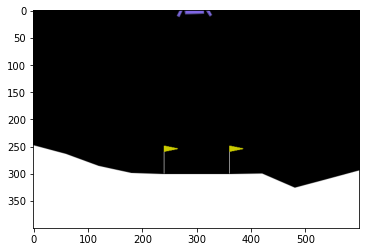

In [9]:
plt.imshow(env_screen)
plt.show()

In [10]:
env.close()

In [11]:
####################################################
# create an animation
#===================================================

In [12]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

env = gym.make("LunarLander-v2", render_mode="rgb_array")
env.reset()
terminated = False
total_reward = 0.0
env_screens = []
while not terminated:
    # choose a ramdom action
    action = env.action_space.sample() 
    # tak action
    observation, reward, terminated, truncated, info = env.step(action) 
    # prepare next step
    total_reward += reward
    env_screen = env.render() # numpy.ndarray
    env_screens.append(env_screen)

env.close()
total_reward

-258.96863742461517

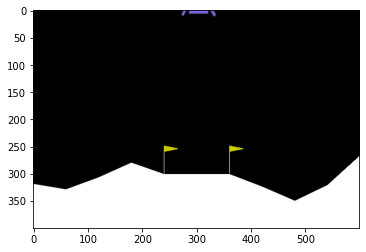

In [13]:
fig, ax = plt.subplots()
im = ax.imshow(env_screens[0])

def update(i):
    im.set_data(env_screens[i])
    return (im)

animation = FuncAnimation(fig=fig, func=update, frames=len(env_screens), interval=100)
#plt.show()

# display the animation in the notebook
HTML(animation.to_jshtml())

In [14]:
##################################################
# use continuous environment
##################################################

In [15]:
import gym

parameters = {
    'continuous': True,
    'gravity': -11.99,
    'enable_wind': True,
    'wind_power': 20.0,
    'turbulence_power': 2.0,
}

ENV_NAME = "LunarLander-v2"
env = gym.make(ENV_NAME, **parameters, render_mode="rgb_array")

env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<LunarLander<LunarLander-v2>>>>>

In [16]:
observation, info = env.reset()
observation, info

(array([-9.1457367e-04,  1.4115677e+00, -9.1705963e-02,  2.8779130e-02,
         2.1387480e-04,  4.1040410e-03,  0.0000000e+00,  0.0000000e+00],
       dtype=float32),
 {})

In [17]:
env.observation_space

Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)

In [18]:
# action = (main, lateral) 
# main = the throttle of the main engine
# lateral = the throttle of the lateral boosters (negative:left, positive:right)

env.action_space 

Box(-1.0, 1.0, (2,), float32)

In [19]:
# action is np.array([main, lateral])
env.action_space.sample() 

array([ 0.46860173, -0.36460236], dtype=float32)

In [20]:
env.close()

In [21]:
####################################################
# create an animation
#===================================================

In [22]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


parameters = {
    'continuous': True,
    'gravity': -11.99,
    'enable_wind': True,
    'wind_power': 0.0001,
    'turbulence_power': 0.0000001,
}

ENV_NAME = "LunarLander-v2"
env = gym.make(ENV_NAME, **parameters, render_mode="rgb_array")

env.reset()
terminated = False
total_reward = 0.0
env_screens = []
while not terminated:
    action = np.array([0.1 , -0.8]) # main and left booster fire
    # tak action
    observation, reward, terminated, truncated, info = env.step(action) 
    # prepare next step
    total_reward += reward
    env_screen = env.render() # numpy.ndarray
    env_screens.append(env_screen)

env.close()
total_reward

-693.6933072583838

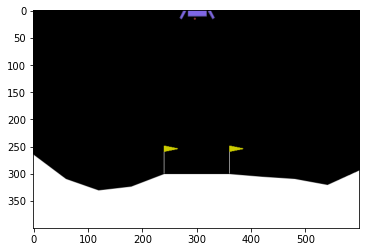

In [23]:
####################################################
# create an animation
#===================================================

fig, ax = plt.subplots()
im = ax.imshow(env_screens[0])

def update(i):
    im.set_data(env_screens[i])
    return (im)

animation = FuncAnimation(fig=fig, func=update, frames=len(env_screens), interval=100)
plt.show()

# display the animation in the notebook
HTML(animation.to_jshtml())
